# AUTO SCOUT MACHINE LEARNING PROJECT

We continue "Car Price Prediction Project". I personally cleaned, handled missing values and outliers. We'll use ML models and try to predict car prices accurately.

# Exploratory Data Analysis

## Import Libraries

In [146]:
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb # pip install xgboost==0.90 
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

plt.rcParams["figure.figsize"] = (10,6)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 50)    # pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50) # pd.set_option('display.max_columns', None)
pd.set_option('display.width', 400)      # pd.set_option('display.width', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% ! important; }<style>"))  # Increase the width of Jupyter Notebook # Temporary

import warnings
warnings.filterwarnings('ignore')

## Load and Discover the Data

In [147]:
df = pd.read_csv('final_scout_not_get_dummy.csv')
df.columns = [x.lower() for x in df.columns]
df_ = df.copy()

In [148]:
df.head()

,make_model,km,type,fuel,gears,comfort_convenience,entertaintment_media,extras,safety_security,body_type,price,vat,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,co2_emission
0,Audi A1,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,15770,VAT deductible,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.000,99.000
1,Audi A1,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,14500,Price negotiable,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.000,129.000
2,Audi A1,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,14640,VAT deductible,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.000,99.000
3,Audi A1,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,14500,VAT deductible,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.000,99.000
4,Audi A1,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,16790,VAT deductible,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.000,109.000


In [149]:
def first_review(df):
    print(df.shape)
    print("-"*75)
    print(df.info())
    print("-"*75)
    print(df.isnull().sum())
    print("-"*75)
    print(df.describe().T)
    print("-"*75)
    print(df.duplicated().value_counts())
first_review(df)

(15914, 24)
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15914 non-null  object 
 1   km                    15914 non-null  float64
 2   type                  15914 non-null  object 
 3   fuel                  15914 non-null  object 
 4   gears                 15914 non-null  float64
 5   comfort_convenience   15914 non-null  object 
 6   entertaintment_media  15914 non-null  object 
 7   extras                15914 non-null  object 
 8   safety_security       15914 non-null  object 
 9   body_type             15914 non-null  object 
 10  price                 15914 non-null  int64  
 11  vat                   15914 non-null  object 
 12  age                   15914 non-null  float64
 13  previous_owners       15914 non-n

In [150]:
df[df.duplicated()]

,make_model,km,type,fuel,gears,comfort_convenience,entertaintment_media,extras,safety_security,body_type,price,vat,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,co2_emission
81,Audi A1,13406.000,Used,Diesel,7.000,"Air conditioning,Armrest,Auxiliary heating,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Shift paddles...","Alarm system,Central door lock,Daytime running...",Sedans,18500,VAT deductible,1.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.000,99.000
123,Audi A1,27000.000,Employee's car,Diesel,7.000,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Sedans,18700,VAT deductible,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1275.000,front,3.000,97.000
136,Audi A1,4800.000,Employee's car,Benzine,7.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",Compact,18333,VAT deductible,1.000,1.000,70.000,1,Metallic,Cloth,Automatic,999.000,1165.000,front,4.000,105.000
287,Audi A1,63668.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",Sedans,15090,VAT deductible,3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1135.000,front,3.000,99.000
291,Audi A1,63668.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",Sedans,15090,VAT deductible,3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1135.000,front,3.000,99.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,Renault Espace,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Van,42500,VAT deductible,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,135.000
15896,Renault Espace,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Van,41400,VAT deductible,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,135.000
15909,Renault Espace,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Van,39950,VAT deductible,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,139.000
15912,Renault Espace,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Van,39700,VAT deductible,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,139.000


In [151]:
# df = df.loc[~df.duplicated(),:]
# df.shape

## Data Wrangling

In [152]:
df_numeric = df.select_dtypes('number')
df_numeric

,km,gears,price,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb,co2_emission
0,56013.000,7.000,15770,3.000,2.000,66.000,1,1422.000,1220.000,3.000,99.000
1,80000.000,7.000,14500,2.000,1.000,141.000,0,1798.000,1255.000,5.000,129.000
2,83450.000,7.000,14640,3.000,1.000,85.000,0,1598.000,1135.000,3.000,99.000
3,73000.000,6.000,14500,3.000,1.000,66.000,0,1422.000,1195.000,3.000,99.000
4,16200.000,7.000,16790,3.000,1.000,66.000,1,1422.000,1135.000,4.000,109.000
...,...,...,...,...,...,...,...,...,...,...,...
15909,1647.363,6.000,39950,0.000,1.000,147.000,0,1997.000,1758.000,5.000,139.000
15910,9900.000,7.000,39885,0.000,1.000,165.000,0,1798.000,1708.000,7.000,168.000
15911,15.000,6.000,39875,0.000,1.000,146.000,1,1997.000,1734.000,5.000,139.000
15912,10.000,6.000,39700,0.000,1.000,147.000,0,1997.000,1758.000,5.000,139.000


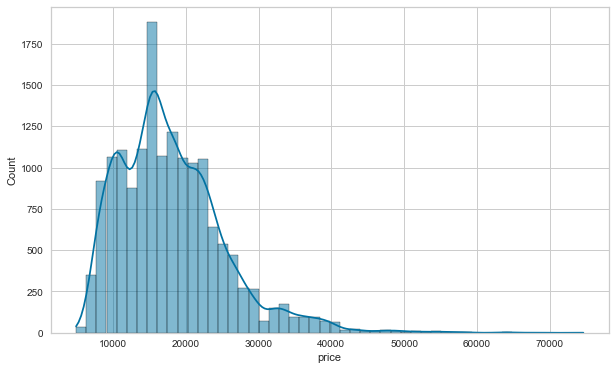

In [153]:
sns.histplot(df.price, bins=50, kde=True);

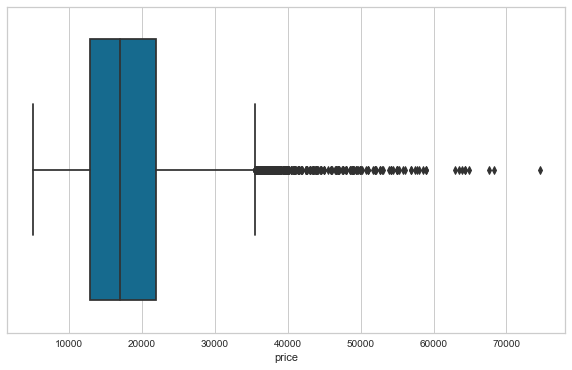

In [154]:
sns.boxplot(df.price);

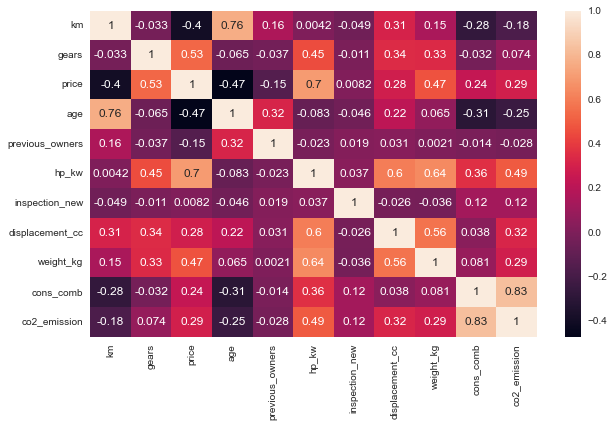

In [155]:
sns.heatmap(df.corr(), annot =True);

In [156]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1) | (df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()  # Multicollinearity Control

False

In [157]:
df_object = df.select_dtypes(include ="object")
df_object

,make_model,type,fuel,comfort_convenience,entertaintment_media,extras,safety_security,body_type,vat,paint_type,upholstery_type,gearing_type,drive_chain
0,Audi A1,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
1,Audi A1,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,Price negotiable,Metallic,Cloth,Automatic,front
2,Audi A1,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
3,Audi A1,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
4,Audi A1,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,Renault Espace,New,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Van,VAT deductible,Metallic,Part/Full Leather,Automatic,front
15910,Renault Espace,Used,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Van,VAT deductible,Metallic,Cloth,Automatic,front
15911,Renault Espace,Pre-registered,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",Van,VAT deductible,Metallic,Part/Full Leather,Automatic,front
15912,Renault Espace,Pre-registered,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Van,VAT deductible,Metallic,Part/Full Leather,Automatic,front


In [158]:
df_object.nunique()

make_model                 8
type                       5
fuel                       4
comfort_convenience     6196
entertaintment_media     346
extras                   659
safety_security         4442
body_type                  8
vat                        2
paint_type                 3
upholstery_type            2
gearing_type               3
drive_chain                3
dtype: int64

In [159]:
for i in df.columns:
    if df[i].nunique()<10:
        print(df[i].value_counts(), df.groupby(i)['price'].mean())
        print("-"*40)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64 make_model
Audi A1          18864.689
Audi A3          20996.693
Opel Astra       15840.834
Opel Corsa       11061.842
Opel Insignia    21463.452
Renault Clio     11940.321
Renault Duster   13230.176
Renault Espace   30080.212
Name: price, dtype: float64
----------------------------------------
Used              11095
New                1649
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: type, dtype: int64 type
Demonstration    25774.387
Employee's car   18388.396
New              23798.834
Pre-registered   20743.063
Used             16241.848
Name: price, dtype: float64
----------------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64 fuel
Benzine    17899.681
Diesel     18176

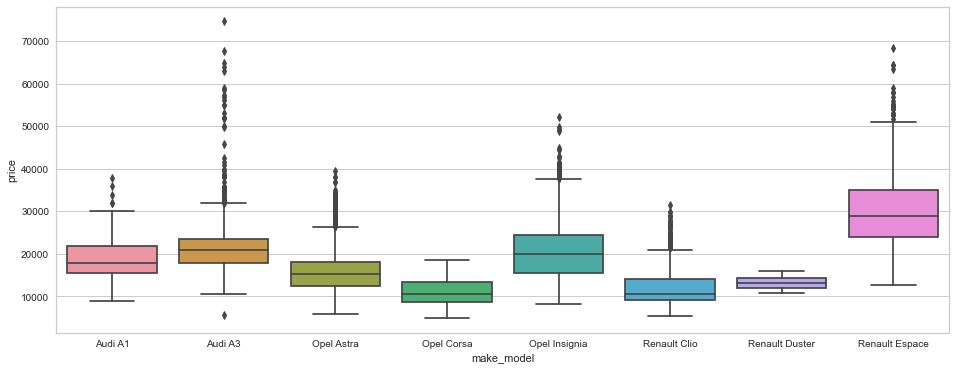

In [160]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

In [161]:
total_outliers = []
for model in df.make_model.unique():
    car_prices = df[df["make_model"] == model]["price"]
    Q1 = car_prices.quantile(0.10) 
    Q3 = car_prices.quantile(0.90)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    total_outliers.append(count_of_outliers)
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 0    ,           The rate of outliers : 0.0
 The count of outlier for Audi A3         : 21   ,           The rate of outliers : 0.007
 The count of outlier for Opel Astra      : 1    ,           The rate of outliers : 0.0
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Clio    : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 0    ,           The rate of outliers : 0.0

Total_outliers :  22 The rate of total outliers : 0.001


In [162]:
df_object[['comfort_convenience','entertaintment_media','extras','safety_security']]

,comfort_convenience,entertaintment_media,extras,safety_security
0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."
...,...,...,...,...
15909,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r..."
15910,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor..."
15911,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor..."
15912,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec..."


## Encode

In [163]:
X = df.drop(columns="price")
y = df.price

In [164]:
X.shape

(15914, 23)

In [165]:
y.shape

(15914,)

In [166]:
def trans_1(X, y, test_size = 0.2, random_state=101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train = X_train.join(X_train["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["entertaintment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.join(X_test["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["entertaintment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    X_train.drop(columns=["comfort_convenience","entertaintment_media","extras","safety_security"], inplace = True)
    X_test.drop(columns=["comfort_convenience","entertaintment_media","extras","safety_security"], inplace = True)
    return X_train, X_test, y_train, y_test

In [167]:
"""
df5 = pd.DataFrame({"a": ["aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2","aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2","aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2"],"b": ["bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2","bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2","bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2"],"y":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]})
df5.head()
X= df5.drop(columns="y",axis=1)
y= df5.y

def trans_1(X, y, test_size = 0.2, random_state=101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train = X_train.join(X_train["a"].str.get_dummies(sep = ",").add_prefix("a_"))
    X_train = X_train.join(X_train["b"].str.get_dummies(sep = ",").add_prefix("b_"))
    X_test = X_test.join(X_test["a"].str.get_dummies(sep = ",").add_prefix("a_"))
    X_test = X_test.join(X_test["b"].str.get_dummies(sep = ",").add_prefix("b_"))
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    X_train.drop(columns=["a","b"], inplace = True)
    X_test.drop(columns=["a","b"], inplace = True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = trans_1(X, y)
X_train.head()
X_test.head()
"""

'\ndf5 = pd.DataFrame({"a": ["aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2","aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2","aa,b1,c1","bb,b1,c1","cc,b1,c2","dd,b1,c2","ee,b2,c2"],"b": ["bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2","bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2","bb,c1,d1","cc,c1,d1","dd,c1,d2","ee,c1,d2","ff,c2,d2"],"y":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]})\ndf5.head()\nX= df5.drop(columns="y",axis=1)\ny= df5.y\n\ndef trans_1(X, y, test_size = 0.2, random_state=101):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)\n    X_train = X_train.join(X_train["a"].str.get_dummies(sep = ",").add_prefix("a_"))\n    X_train = X_train.join(X_train["b"].str.get_dummies(sep = ",").add_prefix("b_"))\n    X_test = X_test.join(X_test["a"].str.get_dummies(sep = ",").add_prefix("a_"))\n    X_test = X_test.join(X_test["b"].str.get_dummies(sep = ",").add_prefix("b_"))\n    X_test = X_test.reindex

In [168]:
X_train, X_test, y_train, y_test = trans_1(X, y)

In [169]:
X_train.head()

,make_model,km,type,fuel,gears,body_type,vat,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,co2_emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,...,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,Opel Insignia,79640.000,Used,Diesel,6.000,Station wagon,VAT deductible,2.000,1.000,125.000,0,Metallic,Cloth,Manual,1956.000,1733.000,front,4.000,119.000,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,Opel Corsa,129617.000,Used,Diesel,5.000,Sedans,VAT deductible,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1398.000,1163.000,front,5.000,124.000,1,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,Opel Insignia,16300.000,Used,Diesel,6.000,Sedans,VAT deductible,2.000,1.000,100.000,1,Metallic,Cloth,Manual,1598.000,1503.000,front,4.000,126.000,1,0,1,0,0,1,...,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7601,Opel Astra,10350.000,Demonstration,Diesel,6.000,Station wagon,VAT deductible,0.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1536.000,front,5.000,134.000,1,0,1,1,0,1,...,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4209,Audi A3,26450.000,Used,Diesel,6.000,Station wagon,VAT deductible,2.000,1.000,81.000,0,Metallic,Cloth,Manual,1598.000,1365.000,front,3.600,107.000,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1


In [170]:
X_train.shape

(12731, 113)

In [171]:
X_test.head()

,make_model,km,type,fuel,gears,body_type,vat,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,co2_emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,...,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15078,Renault Espace,49606.000,Used,Benzine,6.000,Van,VAT deductible,2.000,2.000,147.000,0,Metallic,Cloth,Automatic,1618.000,1734.000,front,6.000,153.000,1,0,1,1,0,1,...,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13096,Renault Clio,100.000,New,Benzine,6.000,Compact,VAT deductible,1.000,1.000,88.000,1,Metallic,Cloth,Automatic,1197.000,1087.000,front,5.000,120.000,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11348,Opel Insignia,11000.000,Used,Benzine,6.000,Sedans,VAT deductible,1.000,1.000,121.000,1,Metallic,Cloth,Automatic,1490.000,1503.000,front,5.200,133.000,1,0,1,1,0,1,...,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2667,Audi A3,58000.000,Used,Diesel,7.000,Sedans,VAT deductible,3.000,1.000,81.000,0,Metallic,Cloth,Automatic,1598.000,1365.000,front,3.000,98.000,1,0,1,1,0,1,...,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12667,Opel Insignia,7.000,New,Benzine,6.000,Station wagon,VAT deductible,0.000,1.000,121.000,0,Uni/basic,Cloth,Automatic,1490.000,1522.000,front,6.000,149.000,1,0,1,1,0,1,...,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1


In [172]:
X_test.shape

(3183, 113)

## OneHotEncoder

In [173]:
cat = X_train.select_dtypes("object").columns
cat = list(cat)
cat

['make_model',
 'type',
 'fuel',
 'body_type',
 'vat',
 'paint_type',
 'upholstery_type',
 'gearing_type',
 'drive_chain']

In [174]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [175]:
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, columns = enc.get_feature_names(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [176]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,...,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0


In [177]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names(cat))
X_test_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2667,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
12667,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000


In [178]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new 

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,...,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2667,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12667,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0


In [179]:
corr_by_price = pd.concat([X_train_new, y_train],axis=1).corr()['price'].sort_values(ascending=False) # X_train_new.join(y_train)
corr_by_price

price                    1.000
hp_kw                    0.695
gears                    0.526
weight_kg                0.467
ss_LED Headlights        0.445
                         ...  
make_model_Opel Corsa   -0.379
upholstery_type_Cloth   -0.388
km                      -0.404
gearing_type_Manual     -0.433
age                     -0.478
Name: price, Length: 143, dtype: float64

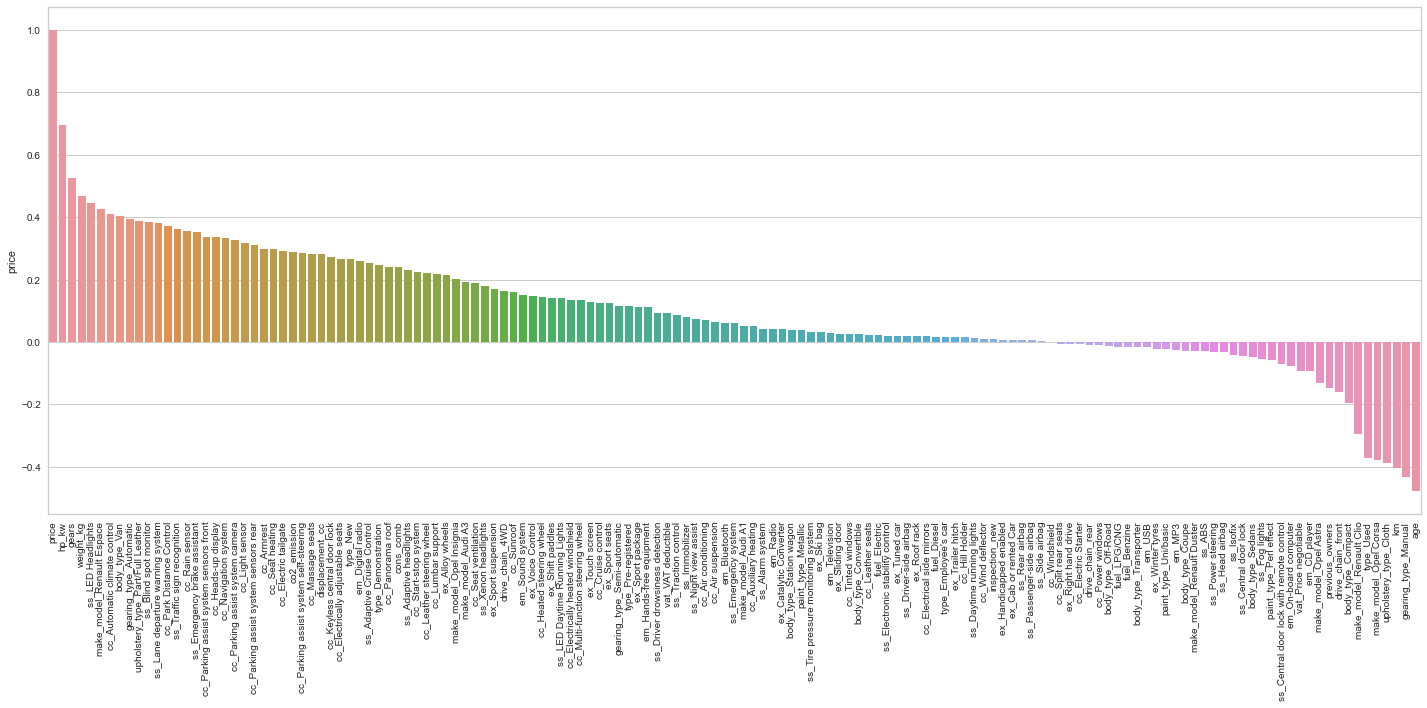

In [180]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

In [181]:
pd.concat([X_train_new, X_test_new]).select_dtypes('O').columns

Index([], dtype='object')

In [182]:
X_train = X_train_new
X_test  = X_test_new

## Modelling

In [183]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

### Linear Regression

In [184]:
operations = [("lr", LinearRegression())]
pipe_model = Pipeline(steps = operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [185]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1707.011,1710.320
mse,6019915.116,5792630.655
rmse,2453.552,2406.788


#### Adjusted R2 score control

In [186]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [187]:
operations = [('lr',LinearRegression())]
model = Pipeline(operations)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
adj_r2(y_test, y_pred, X)

0.8901934103359482

In [188]:
operations = [('lr',LinearRegression())]
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                                    0.886
train_r2                                   0.891
test_neg_mean_absolute_error           -1731.433
train_neg_mean_absolute_error          -1706.031
test_neg_mean_squared_error         -6231557.714
train_neg_mean_squared_error        -6009090.561
test_neg_root_mean_squared_error       -2494.012
train_neg_root_mean_squared_error      -2451.315
dtype: float64

In [189]:
df_scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.053,0.003,0.887,0.890,-1672.120,-1720.097,-5435379.819,-6099204.487,-2331.390,-2469.657
2,0.052,0.004,0.884,0.891,-1775.053,-1698.534,-6231786.254,-6008423.897,-2496.355,-2451.209
3,0.055,0.004,0.890,0.890,-1741.579,-1706.079,-6083258.660,-6025262.925,-2466.426,-2454.641
4,0.062,0.005,0.883,0.891,-1740.366,-1700.923,-6927674.552,-5934361.709,-2632.048,-2436.055
5,0.064,0.004,0.890,0.890,-1741.044,-1702.639,-6440213.904,-5986803.418,-2537.758,-2446.795
6,0.064,0.005,0.886,0.891,-1729.923,-1705.528,-6460249.568,-5980401.705,-2541.702,-2445.486
7,0.057,0.004,0.887,0.891,-1738.439,-1710.163,-5858245.825,-6047459.049,-2420.381,-2459.158
8,0.057,0.004,0.902,0.889,-1679.163,-1709.098,-5500156.386,-6088740.721,-2345.241,-2467.537
9,0.055,0.004,0.875,0.892,-1755.007,-1698.179,-7209928.331,-5900312.595,-2685.131,-2429.056
10,0.053,0.004,0.881,0.891,-1741.631,-1709.071,-6168683.837,-6019935.107,-2483.684,-2453.556


In [190]:
2451.315 / df.price.mean() # rmse / sales_mean

0.13600478261993243

In [191]:
operations = [('lr',LinearRegression())]
lm2 = Pipeline(operations)
lm2.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [192]:
y_pred = lm2.predict(X_test)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Ridge Regression

##### Scale

In [193]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Modelling and Evaluation

In [194]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.890,0.890
mae,1705.125,1709.893
mse,6022819.893,5801490.192
rmse,2454.143,2408.628


##### Cross Validation

In [195]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.886
train_r2                                   0.890
test_neg_mean_absolute_error           -1728.912
train_neg_mean_absolute_error          -1703.940
test_neg_mean_squared_error         -6229859.794
train_neg_mean_squared_error        -6012669.649
test_neg_root_mean_squared_error       -2493.653
train_neg_root_mean_squared_error      -2452.045
dtype: float64

In [196]:
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.888,0.890,-1669.172,-1717.940,-5415103.362,-6102901.508,-2327.037,-2470.405
2,0.884,0.891,-1774.404,-1696.327,-6238669.243,-6011918.113,-2497.733,-2451.921
3,0.890,0.890,-1738.897,-1703.524,-6078028.852,-6028897.267,-2465.366,-2455.381
4,0.884,0.891,-1738.073,-1698.758,-6902143.329,-5938223.271,-2627.193,-2436.847
5,0.890,0.890,-1737.472,-1700.795,-6445011.228,-5990399.626,-2538.703,-2447.529
6,0.886,0.891,-1727.732,-1703.523,-6469927.588,-5983923.546,-2543.605,-2446.206
7,0.887,0.890,-1735.390,-1708.044,-5855610.456,-6051054.652,-2419.837,-2459.889
8,0.902,0.889,-1677.643,-1707.037,-5515965.658,-6092103.737,-2348.609,-2468.219
9,0.875,0.892,-1751.895,-1696.412,-7227393.473,-5903737.257,-2688.381,-2429.761
10,0.881,0.891,-1738.444,-1707.045,-6150744.749,-6023537.512,-2480.070,-2454.290


##### GridSearch(Hyperparameter optimization)

In [197]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [198]:
ridge_model = Ridge()
param_grid = {'alpha':alpha_space}
ridge_grid_model = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs = -1)
ridge_grid_model.fit(X_train_scaled,y_train)
ridge_grid_model.best_params_

{'alpha': 1.02}

In [199]:
pd.DataFrame(ridge_grid_model.cv_results_) 
# ridge_grid_model.best_score_ # -2493.663961436855

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087,0.024,0.002,0.001,0.010,{'alpha': 0.01},-2331.331,-2496.358,-2466.406,-2631.978,-2537.758,-2541.713,-2420.365,-2345.266,-2685.159,-2483.636,-2493.997,107.075,2
1,0.119,0.036,0.004,0.004,1.020,{'alpha': 1.02},-2326.976,-2497.776,-2465.362,-2627.130,-2538.737,-2543.657,-2419.842,-2348.688,-2688.453,-2480.017,-2493.664,107.491,1
2,0.149,0.057,0.003,0.002,2.030,{'alpha': 2.03},-2324.791,-2500.381,-2465.868,-2625.102,-2541.025,-2546.719,-2420.591,-2352.990,-2692.350,-2478.148,-2494.797,107.936,3
3,0.118,0.013,0.002,0.001,3.040,{'alpha': 3.04},-2323.916,-2503.531,-2467.407,-2624.651,-2544.083,-2550.391,-2421.993,-2357.633,-2696.589,-2477.481,-2496.767,108.399,4
4,0.127,0.031,0.003,0.001,4.050,{'alpha': 4.05},-2323.888,-2506.953,-2469.643,-2625.166,-2547.598,-2554.396,-2423.782,-2362.407,-2701.007,-2477.665,-2499.251,108.864,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.125,0.016,0.003,0.001,95.960,{'alpha': 95.96000000000001},-2450.420,-2685.489,-2696.082,-2785.405,-2765.120,-2753.318,-2557.686,-2590.832,-2933.733,-2624.585,-2684.267,129.193,96
96,0.125,0.032,0.003,0.001,96.970,{'alpha': 96.97000000000001},-2451.542,-2686.745,-2697.786,-2786.733,-2766.661,-2754.552,-2558.701,-2592.431,-2935.382,-2625.646,-2685.618,129.327,97
97,0.118,0.041,0.003,0.001,97.980,{'alpha': 97.98},-2452.661,-2687.996,-2699.483,-2788.056,-2768.195,-2755.778,-2559.712,-2594.022,-2937.022,-2626.700,-2686.963,129.461,98
98,0.124,0.044,0.002,0.001,98.990,{'alpha': 98.99000000000001},-2453.777,-2689.242,-2701.170,-2789.375,-2769.722,-2756.996,-2560.720,-2595.605,-2938.655,-2627.748,-2688.301,129.594,99


##### Remodelling with best params

In [200]:
ridge_model = Ridge(alpha=1.02)
ridge_model.fit(X_train_scaled, y_train)
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.890,0.890
mae,1705.097,1709.892
mse,6022928.422,5801705.392
rmse,2454.166,2408.673


##### Coefficients

In [201]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)
coeff_ridge = pd.DataFrame(ridge.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")
coeff_ridge

,Coef
km,-11121.553
make_model_Renault Duster,-5967.819
age,-4887.825
co2_emission,-3218.437
make_model_Renault Clio,-2940.346
...,...
make_model_Audi A1,2605.564
fuel_Electric,2795.068
make_model_Audi A3,3765.880
make_model_Renault Espace,5619.716


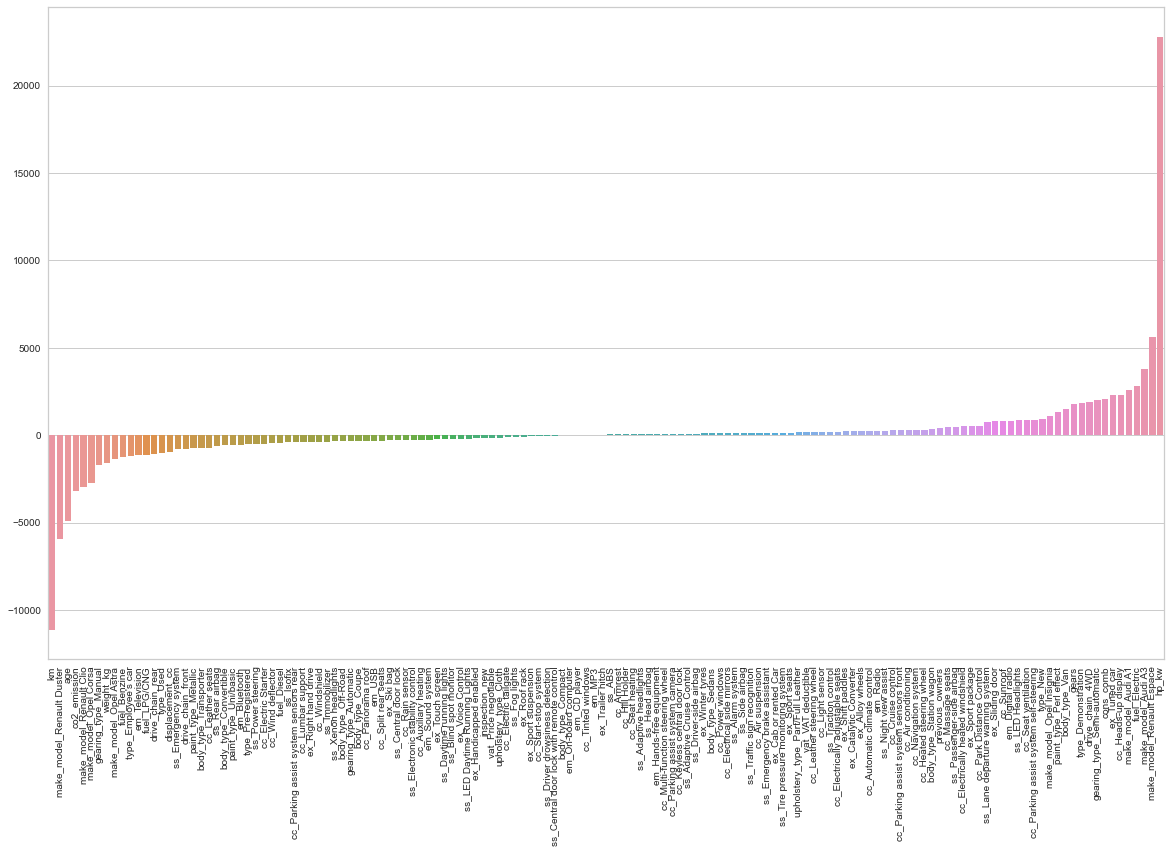

In [202]:
ax = plt.figure(figsize=(20,12)) 
ax = sns.barplot(x=coeff_ridge.index, y=coeff_ridge.values.reshape(142,));
ax.tick_params(axis='x', rotation=90)

##### Saving Scores to Compare

In [203]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Lasso Regression

##### Modelling and Evaluation

In [204]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.890,0.890
mae,1705.793,1709.869
mse,6034254.805,5797794.239
rmse,2456.472,2407.861


##### Cross Validation

In [205]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.890
test_neg_mean_absolute_error           -1727.647
train_neg_mean_absolute_error          -1704.678
test_neg_mean_squared_error         -6217281.482
train_neg_mean_squared_error        -6023588.124
test_neg_root_mean_squared_error       -2491.297
train_neg_root_mean_squared_error      -2454.271
dtype: float64

##### GridSearch(Hyperparameter optimization)

In [206]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [207]:
lasso_model = Lasso()
param_grid = {'alpha':alpha_space}
lasso_grid_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs = -1)
lasso_grid_model.fit(X_train_scaled,y_train)
lasso_grid_model.best_params_

{'alpha': 1.02}

In [208]:
lasso_grid_model.best_score_

-2491.288823835125

In [209]:
pd.DataFrame(lasso_grid_model.cv_results_) 
# lasso_grid_model.best_score_ # -2491.288823835125

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,9.995,0.732,0.004,0.002,0.010,{'alpha': 0.01},-2331.227,-2496.286,-2466.374,-2631.842,-2537.652,-2541.537,-2420.367,-2345.284,-2685.140,-2483.487,-2493.919,107.057,3
1,1.924,0.105,0.005,0.001,1.020,{'alpha': 1.02},-2328.185,-2500.949,-2461.936,-2616.012,-2530.576,-2537.679,-2425.575,-2356.010,-2684.495,-2471.472,-2491.289,103.513,1
2,1.162,0.124,0.005,0.002,2.030,{'alpha': 2.03},-2327.609,-2508.030,-2459.307,-2616.447,-2529.885,-2540.977,-2427.877,-2362.779,-2688.328,-2468.866,-2493.010,103.707,2
3,0.945,0.131,0.006,0.002,3.040,{'alpha': 3.04},-2328.778,-2513.793,-2459.956,-2621.121,-2531.644,-2545.910,-2431.464,-2371.531,-2695.917,-2469.317,-2496.943,104.558,4
4,0.782,0.119,0.005,0.001,4.050,{'alpha': 4.05},-2331.004,-2518.688,-2461.934,-2625.390,-2534.048,-2550.639,-2433.897,-2377.953,-2703.209,-2471.165,-2500.793,105.446,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.258,0.021,0.003,0.001,95.960,{'alpha': 95.96000000000001},-2779.150,-3090.291,-3071.451,-3168.006,-3244.937,-3090.396,-2889.575,-3075.013,-3293.752,-2884.729,-3058.730,155.348,96
96,0.256,0.025,0.003,0.001,96.970,{'alpha': 96.97000000000001},-2783.877,-3095.852,-3077.851,-3174.330,-3251.621,-3095.745,-2894.362,-3082.083,-3299.990,-2888.989,-3064.470,156.038,97
97,0.249,0.018,0.004,0.002,97.980,{'alpha': 97.98},-2788.657,-3101.359,-3084.321,-3180.748,-3258.351,-3101.130,-2899.185,-3089.203,-3306.269,-2893.300,-3070.252,156.730,98
98,0.244,0.011,0.003,0.001,98.990,{'alpha': 98.99000000000001},-2793.490,-3106.859,-3090.848,-3187.100,-3265.128,-3106.580,-2904.083,-3096.344,-3312.589,-2897.585,-3076.061,157.419,99


##### Remodelling with best params

In [210]:
lasso_model = Lasso(alpha = 1.02)
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.890,0.890
mae,1705.780,1709.847
mse,6034748.687,5798110.908
rmse,2456.573,2407.927


##### Coefficients

In [211]:
lasso = Lasso(alpha=1.02).fit(X_train_scaled, y_train)
coeff_lasso = pd.DataFrame(lasso.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")
coeff_lasso

,Coef
km,-11152.909
make_model_Renault Duster,-6048.069
age,-4883.538
make_model_Renault Clio,-2864.043
make_model_Opel Corsa,-2685.442
...,...
drive_chain_4WD,2538.898
make_model_Audi A1,2653.905
make_model_Audi A3,3761.331
make_model_Renault Espace,5438.598


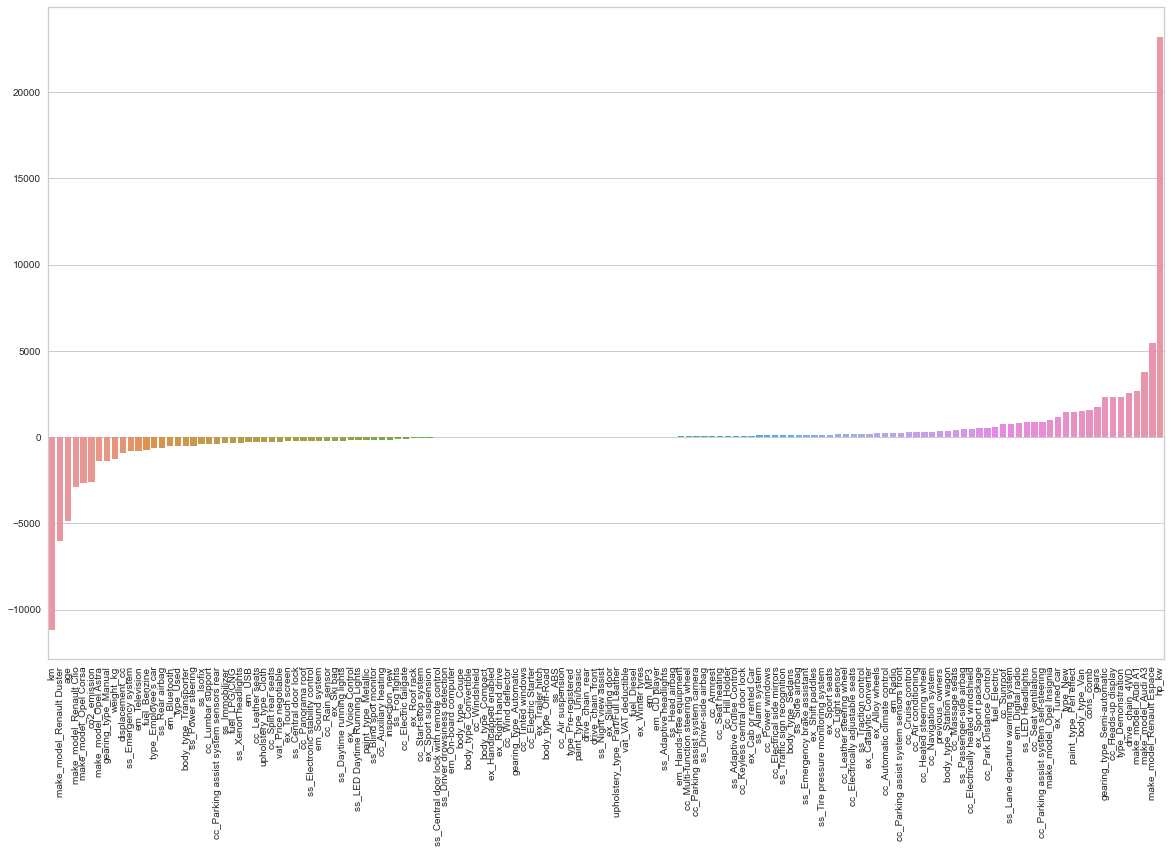

In [212]:
ax = plt.figure(figsize=(20,12)) 
ax = sns.barplot(x=coeff_lasso.index, y=coeff_lasso.values.reshape(142,));
ax.tick_params(axis='x', rotation=90)

##### Saving Scores to Compare

In [213]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Elastic-Net

##### Modelling and Evaluation

In [214]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train)
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.620,0.611
mae,3292.637,3268.766
mse,20844916.004,20553259.777
rmse,4565.623,4533.570


##### Cross Validation

In [215]:
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.619
train_r2                                    0.620
test_neg_mean_absolute_error            -3298.352
train_neg_mean_absolute_error           -3292.265
test_neg_mean_squared_error         -20928031.260
train_neg_mean_squared_error        -20839076.173
test_neg_root_mean_squared_error        -4569.623
train_neg_root_mean_squared_error       -4564.954
dtype: float64

##### GridSearch(Hyperparameter optimization)

In [216]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11], 'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [217]:
elastic_model = ElasticNet()
elastic_grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs = -1)
elastic_grid_model.fit(X_train_scaled, y_train)
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [218]:
pd.DataFrame(elastic_grid_model.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.243,0.049,0.004,0.001,1.020,0.500,"{'alpha': 1.02, 'l1_ratio': 0.5}",-4196.048,-4565.525,-4631.450,-4787.427,-4834.341,-4555.212,-4421.624,-4650.444,-4914.492,-4319.923,-4587.649,216.238,29
1,0.310,0.031,0.004,0.002,1.020,0.700,"{'alpha': 1.02, 'l1_ratio': 0.7}",-3799.144,-4141.217,-4206.647,-4328.433,-4376.053,-4108.148,-3977.171,-4194.351,-4482.974,-3895.854,-4150.999,204.540,25
2,0.486,0.026,0.004,0.001,1.020,0.900,"{'alpha': 1.02, 'l1_ratio': 0.9}",-3145.037,-3430.841,-3503.658,-3567.292,-3594.461,-3407.819,-3243.613,-3428.367,-3755.627,-3228.644,-3430.536,177.295,17
3,0.578,0.041,0.004,0.001,1.020,0.950,"{'alpha': 1.02, 'l1_ratio': 0.95}",-2848.853,-3111.511,-3183.113,-3233.003,-3245.502,-3124.619,-2932.938,-3084.641,-3423.784,-2957.837,-3114.580,161.446,13
4,0.673,0.078,0.004,0.001,1.020,0.990,"{'alpha': 1.02, 'l1_ratio': 0.99}",-2477.388,-2715.548,-2732.531,-2815.401,-2799.360,-2781.357,-2580.940,-2628.768,-2970.645,-2645.037,-2714.698,131.918,9
5,1.568,0.128,0.004,0.001,1.020,1,"{'alpha': 1.02, 'l1_ratio': 1}",-2328.185,-2500.949,-2461.936,-2616.012,-2530.576,-2537.679,-2425.575,-2356.010,-2684.495,-2471.472,-2491.289,103.513,1
6,0.275,0.038,0.004,0.001,2,0.500,"{'alpha': 2, 'l1_ratio': 0.5}",-4790.126,-5186.345,-5258.023,-5456.098,-5488.829,-5222.843,-5063.446,-5309.083,-5538.516,-4954.434,-5226.774,227.893,35
7,0.287,0.032,0.004,0.002,2,0.700,"{'alpha': 2, 'l1_ratio': 0.7}",-4336.529,-4713.945,-4780.807,-4947.803,-4992.594,-4714.007,-4576.143,-4809.155,-5064.702,-4470.314,-4740.600,219.678,32
8,0.352,0.043,0.003,0.002,2,0.900,"{'alpha': 2, 'l1_ratio': 0.9}",-3518.866,-3837.636,-3905.178,-4001.159,-4043.331,-3799.161,-3659.794,-3867.371,-4173.082,-3601.579,-3840.716,194.260,21
9,0.424,0.039,0.004,0.001,2,0.950,"{'alpha': 2, 'l1_ratio': 0.95}",-3138.990,-3424.492,-3496.841,-3561.029,-3588.092,-3402.738,-3237.270,-3422.583,-3749.314,-3222.363,-3424.371,177.214,16


##### Evaluation with best params

In [219]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.890,0.890
mae,1705.780,1709.847
mse,6034748.687,5798110.908
rmse,2456.573,2407.927


##### Coefficients

In [220]:
elastic_model = ElasticNet(alpha=1.02).fit(X_train_scaled, y_train)
coeff_elastic_model = pd.DataFrame(elastic_model.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")
coeff_elastic_model

,Coef
age,-1479.240
type_Used,-1181.071
gearing_type_Manual,-1004.752
make_model_Opel Corsa,-841.767
make_model_Renault Clio,-697.658
...,...
cc_Automatic climate control,725.726
make_model_Renault Espace,746.919
gears,747.669
gearing_type_Automatic,774.497


##### Saving Scores to Compare

In [221]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Feature İmportance

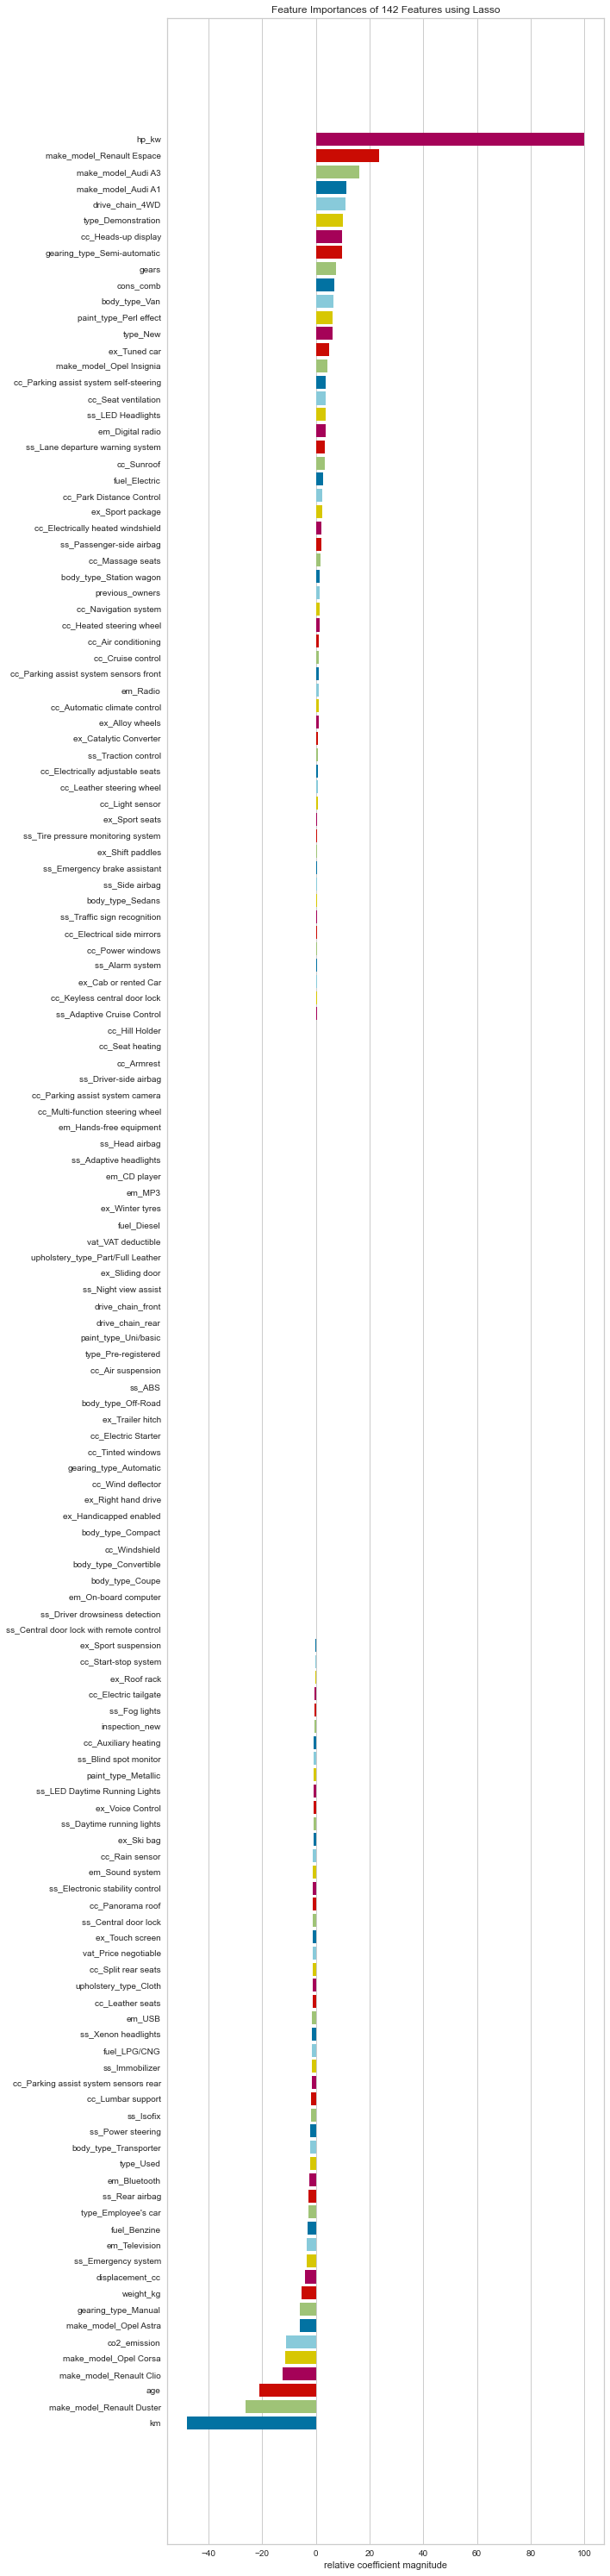

In [222]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
model = Lasso(alpha=1.02)
viz = FeatureImportances(model, labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [223]:
df.head()

,make_model,km,type,fuel,gears,comfort_convenience,entertaintment_media,extras,safety_security,body_type,price,vat,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,co2_emission
0,Audi A1,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,15770,VAT deductible,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.000,99.000
1,Audi A1,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,14500,Price negotiable,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.000,129.000
2,Audi A1,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,14640,VAT deductible,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.000,99.000
3,Audi A1,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,14500,VAT deductible,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.000,99.000
4,Audi A1,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,16790,VAT deductible,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.000,109.000


In [224]:
df_new = df[["make_model", "hp_kw", "km","age", "price", "gearing_type", "gears"]]
df_new

,make_model,hp_kw,km,age,price,gearing_type,gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000
...,...,...,...,...,...,...,...
15909,Renault Espace,147.000,1647.363,0.000,39950,Automatic,6.000
15910,Renault Espace,165.000,9900.000,0.000,39885,Automatic,7.000
15911,Renault Espace,146.000,15.000,0.000,39875,Automatic,6.000
15912,Renault Espace,147.000,10.000,0.000,39700,Automatic,6.000


In [225]:
X = df_new.drop(columns = ["price"])
y = df_new.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [226]:
cat = X_train.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'gearing_type']

In [227]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, columns = enc.get_feature_names(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [228]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,hp_kw,km,age,gears
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,125.000,79640.000,2.000,6.000
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,55.000,129617.000,3.000,5.000
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,100.000,16300.000,2.000,6.000
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,100.000,10350.000,0.000,6.000
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,81.000,26450.000,2.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,1647.363,0.000,6.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,78.000,1647.363,0.000,6.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,17000.000,2.000,5.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,60.000,6400.000,1.000,5.000


In [229]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names(cat))
X_test_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2667,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
12667,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [230]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new 

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,hp_kw,km,age,gears
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,49606.000,2.000,6.000
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,88.000,100.000,1.000,6.000
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,121.000,11000.000,1.000,6.000
2667,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,81.000,58000.000,3.000,7.000
12667,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,121.000,7.000,0.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,3500.000,0.000,5.000
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,122.000,1.000,0.000,6.000
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,24000.000,1.000,6.000
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,8500.000,1.000,6.000


In [231]:
pd.concat([X_train_new, X_test_new])

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,hp_kw,km,age,gears
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,125.000,79640.000,2.000,6.000
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,55.000,129617.000,3.000,5.000
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,100.000,16300.000,2.000,6.000
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,100.000,10350.000,0.000,6.000
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,81.000,26450.000,2.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,3500.000,0.000,5.000
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,122.000,1.000,0.000,6.000
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,24000.000,1.000,6.000
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,8500.000,1.000,6.000


##### Scale

In [232]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

##### Modelling and Evaluation

In [233]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)##### Modelling and Evaluation

,train,test
R2,0.849,0.854
mae,1974.507,1945.481
mse,8304047.510,7693114.402
rmse,2881.674,2773.646


##### Cross Validation

In [234]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.848
train_r2                                   0.849
test_neg_mean_absolute_error           -1976.836
train_neg_mean_absolute_error          -1974.392
test_neg_mean_squared_error         -8325033.112
train_neg_mean_squared_error        -8302946.433
test_neg_root_mean_squared_error       -2884.169
train_neg_root_mean_squared_error      -2881.469
dtype: float64

##### GridSearch(Hyperparameter optimization)

In [235]:
lasso_model = Lasso()
param_grid = {'alpha':alpha_space}
lasso_final_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs = -1)
lasso_final_model.fit(X_train_scaled,y_train)
lasso_final_model.best_score_

-2884.061569821222

In [236]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.849,0.854
mae,1975.952,1946.179
mse,8303260.578,7689522.894
rmse,2881.538,2772.999


##### Saving Scores to Compare

In [237]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Visually Compare Models Performance In a Graph

In [238]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.890,1710.320,2406.788
ridge_m,0.890,1709.892,2408.673
lasso_m,0.890,1709.847,2407.927
elastic_m,0.890,1709.847,2407.927
final_m,0.854,1946.179,2772.999


## AUTOMATED MACHINE LEARNING

### Vanilla Models

In [239]:
models = [# ('LR', LinearRegression()),("Ridge", Ridge()),("Lasso", Lasso()),("ElasticNet", ElasticNet())
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))
          ]

In [240]:
for name, regressor in models:
    scores = cross_validate(regressor, X_train_scaled, y_train, scoring=['r2','neg_root_mean_squared_error'], cv=10, return_train_score=True)
    scores = pd.DataFrame(scores, index = range(1, 11))
    scores = scores.iloc[:,2:].mean()
    print(f"{round(scores, 4)} {name}", "MODEL")

test_r2                                 0.928
train_r2                                0.950
test_neg_root_mean_squared_error    -1977.431
train_neg_root_mean_squared_error   -1658.501
dtype: float64 KNN MODEL
test_r2                                 0.908
train_r2                                0.983
test_neg_root_mean_squared_error    -2238.859
train_neg_root_mean_squared_error    -961.393
dtype: float64 CART MODEL
test_r2                                 0.928
train_r2                                0.976
test_neg_root_mean_squared_error    -1979.565
train_neg_root_mean_squared_error   -1137.972
dtype: float64 RF MODEL
test_r2                                 0.098
train_r2                                0.098
test_neg_root_mean_squared_error    -7033.100
train_neg_root_mean_squared_error   -7036.678
dtype: float64 SVR MODEL
test_r2                                 0.915
train_r2                                0.921
test_neg_root_mean_squared_error    -2153.798
train_neg_root_mean_square

### Automated Hyperparameter Optimization

In [241]:
cat_params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3]}

xgboost_params = {"learning_rate": [0.1, 0.01, 0.01],
                  "max_depth": [5, 8, 12, 20],
                  "n_estimators": [100, 200, 300, 500],
                  "colsample_bytree": [0.5, 0.8, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [245]:
regressors = [("CAT", CatBoostRegressor(verbose=False), cat_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]

best_models = {}
for name, regressor, params in regressors:
    gs_best = GridSearchCV(regressor, params, cv=10, n_jobs=-1,scoring='neg_root_mean_squared_error', verbose=False).fit(X_train_scaled, y_train)
    print(gs_best.best_params_)
    print(train_val(gs_best, X_train_scaled, y_train, X_test_scaled, y_test))

{'depth': 9, 'iterations': 500, 'learning_rate': 0.1}
           train        test
R2         0.959       0.933
mae      969.500    1150.428
mse  2226061.858 3514442.608
rmse    1491.999    1874.685
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
           train        test
R2         0.964       0.937
mae      899.140    1129.515
mse  1999613.971 3345251.855
rmse    1414.077    1829.003
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 500}
           train        test
R2         0.952       0.934
mae     1020.098    1170.406
mse  2627659.982 3479447.528
rmse    1621.006    1865.328


### Prediction

In [301]:
X.head(1)

,make_model,hp_kw,km,age,gearing_type,gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000


In [299]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'gearing_type']

In [304]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())

In [305]:
operations = [("OneHotEncoder", column_trans), ("LightGBM", LGBMRegressor(colsample_bytree = 0.5, learning_rate = 0.1, n_estimators = 500))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)  

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('LightGBM',
                 LGBMRegressor(colsample_bytree=0.5, n_estimators=500))])

In [316]:
pipe_model.predict(X.tail(1))

array([39096.97226266])

In [315]:
y.tail(1)

15913    40999
Name: price, dtype: int64

In [317]:
X.tail(1)

,make_model,hp_kw,km,age,gearing_type,gears
15913,Renault Espace,165.000,1647.363,0.000,Automatic,6.000


# THANK YOU FOR YOUR TIME!